<a href="https://colab.research.google.com/github/smritisinha0801/Stock-Price/blob/main/stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

# Define stock symbol & date range
stock_symbol = "AAPL"  # Change to TSLA, GOOGL, etc.
start_date = "2020-01-01"
end_date = "2024-01-01"

# Download data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Save as CSV
stock_data.to_csv(f"{stock_symbol}_stock_data.csv")

print(f"Stock data saved as {stock_symbol}_stock_data.csv")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Stock data saved as AAPL_stock_data.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
stock_symbol = "AAPL"
stock_data = yf.download(stock_symbol, start="2020-01-01", end="2024-01-01")
stock_data = stock_data[['Close']]  # Use only closing price

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data.head(10)

Price,Close
Ticker,AAPL
Date,
2020-01-02,72.716057
2020-01-03,72.009117
2020-01-06,72.582916
2020-01-07,72.241539
2020-01-08,73.403641
2020-01-09,74.962791
2020-01-10,75.132263
2020-01-13,76.737411


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)

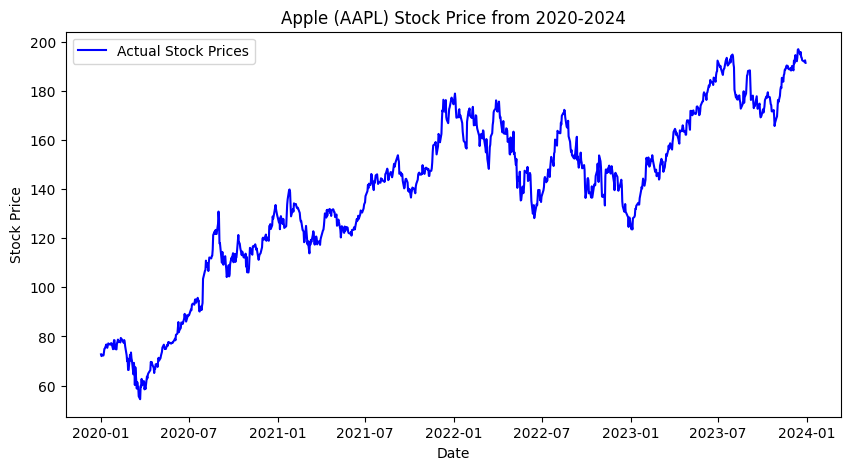

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, stock_data['Close'], label="Actual Stock Prices", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Apple (AAPL) Stock Price from 2020-2024")
plt.legend()
plt.show()

In [ ]:
def create_sequences(data, seq_length=50):
    X, Y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        Y.append(data[i+seq_length])
    return np.array(X), np.array(Y)

seq_length = 50
X, Y = create_sequences(scaled_data, seq_length)

In [ ]:
train_size = int(len(X) * 0.8)
X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

print(f"✅ Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")

✅ Training Samples: 764, Testing Samples: 192


In [ ]:
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")

X_train shape: (764, 50, 1), Y_train shape: (764, 1)
X_test shape: (192, 50, 1), Y_test shape: (192, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),  # LSTM Layer 1
    LSTM(50, return_sequences=False),  # LSTM Layer 2
    Dense(25, activation='relu'),  # Fully Connected Layer
    Dense(1)  # Output Layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lstm_model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0877 - val_loss: 0.0095
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0040 - val_loss: 0.0074
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0024 - val_loss: 0.0042
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0017 - val_loss: 0.0042
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0016 - val_loss: 0.0036
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0

In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_model.predict(X_test))

# Convert Y_test back to original scale for comparison
Y_test_original = scaler.inverse_transform(Y_test.reshape(-1, 1))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


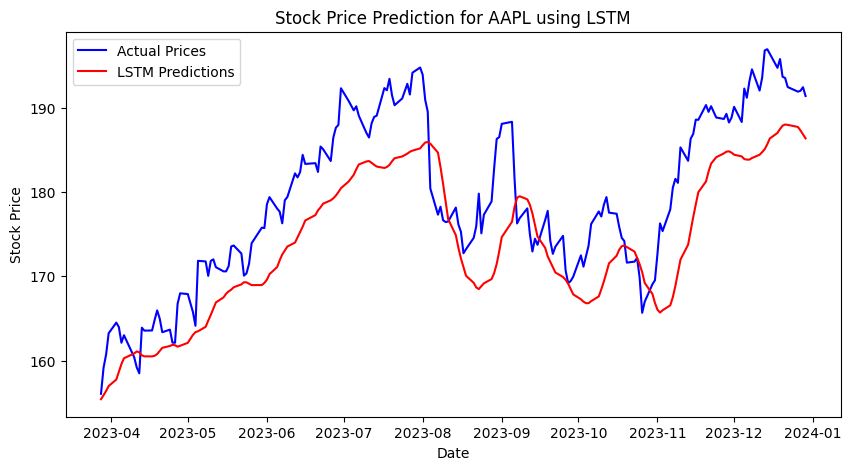

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index[-len(Y_test):], Y_test_original, label="Actual Prices", color='blue')
plt.plot(stock_data.index[-len(Y_test):], lstm_predictions, label="LSTM Predictions", color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Stock Price Prediction for {stock_symbol} using LSTM")
plt.show()

In [ ]:
# Get last 50 days of stock prices for LSTM Future Prediction
last_sequence = scaled_data[-seq_length:].reshape(1, seq_length, 1)

In [ ]:
future_days = 30  # Predict next 30 days
future_predictions = []

for _ in range(future_days):
    next_price = lstm_model.predict(last_sequence)[0][0]  # Predict next price
    future_predictions.append(next_price)

    # Update input sequence: Remove first element, add new prediction
    last_sequence = np.append(last_sequence[:, 1:, :], [[[next_price]]], axis=1)

# Convert Predictions Back to Original Scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

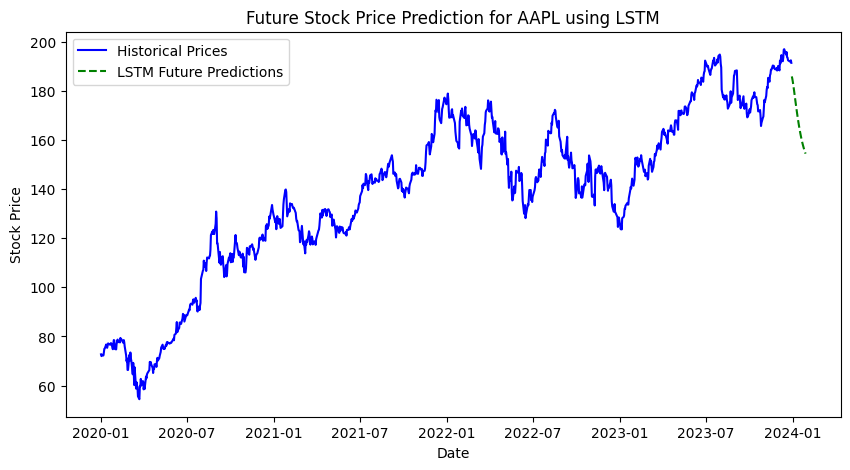

In [ ]:
import datetime

# Create date range for the next 30 days
last_date = stock_data.index[-1]
future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, future_days+1)]

# Plot Predictions
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index, stock_data['Close'], label="Historical Prices", color='blue')
plt.plot(future_dates, future_predictions, label="LSTM Future Predictions", color='green', linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Future Stock Price Prediction for {stock_symbol} using LSTM")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [ ]:
gru_model = Sequential([
    GRU(50, return_sequences=True, input_shape=(seq_length, 1)),  # GRU Layer 1
    GRU(50, return_sequences=False),  # GRU Layer 2
    Dense(25, activation='relu'),  # Fully Connected Layer
    Dense(1)  # Output Layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
gru_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
gru_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,551 (95.90 KB)

 Trainable params: 24,551 (95.90 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train Model
gru_model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.1632 - val_loss: 0.0158
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0058 - val_loss: 0.0081
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 7.4088e-04 - val_loss: 6.6974e-04
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 6.6313e-04 - val_loss: 8.6884e-04
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 6.2334e-04 - val_loss: 4.4309e-04
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 7.2642e-04 - val_loss: 5.1408e-04
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 6.8734e-04 - val_loss: 0.0011
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 5.6348e-04 - val_loss: 3.9596e-04
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 6.2910e-04 - val_loss: 4.6994e-04
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 5.8777e-04 - val_loss: 3.9939e-04
Epo

In [ ]:
# Predict Stock Prices
gru_predictions = scaler.inverse_transform(gru_model.predict(X_test))

# Convert Y_test back to original scale for comparison
Y_test_original = scaler.inverse_transform(Y_test.reshape(-1, 1))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


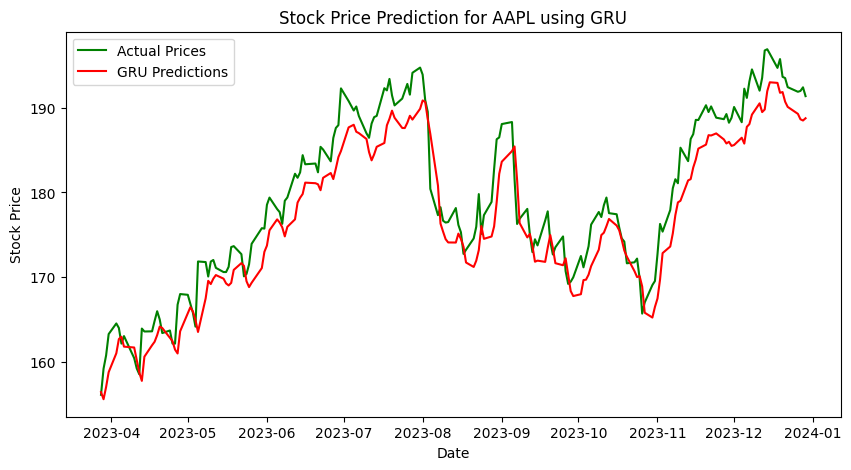

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index[-len(Y_test):], Y_test_original, label="Actual Prices", color='green')
plt.plot(stock_data.index[-len(Y_test):], gru_predictions, label="GRU Predictions", color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Stock Price Prediction for {stock_symbol} using GRU")
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Define Transformer Block
def transformer_block(inputs, num_heads=4, ff_dim=32, dropout_rate=0.1):
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    attention = Dropout(dropout_rate)(attention)
    attention = LayerNormalization(epsilon=1e-6)(inputs + attention)  # Residual connection

    ff = Dense(ff_dim, activation="relu")(attention)
    ff = Dense(inputs.shape[-1])(ff)
    ff = Dropout(dropout_rate)(ff)
    outputs = LayerNormalization(epsilon=1e-6)(attention + ff)  # Residual connection

    return outputs

In [ ]:
# Define Transformer Model
def build_transformer_model(seq_length, feature_dim=1, num_heads=4, ff_dim=32, num_layers=2):
    inputs = Input(shape=(seq_length, feature_dim))
    x = inputs
    for _ in range(num_layers):
        x = transformer_block(x, num_heads, ff_dim)

    x = Dense(25, activation="relu")(x)
    x = Dense(1)(x)  # Predicts each timestep's next value

    model = Model(inputs, x)

    optimizer = Adam(learning_rate=0.0001)  # Reduce learning rate
    model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])

    return model

In [ ]:
# Load Data (Assuming stock_data is available)
seq_length = 50  # Adjust based on data
scaler = MinMaxScaler()


In [ ]:
X_train = np.array(X_train).reshape(-1, seq_length, 1)
X_test = np.array(X_test).reshape(-1, seq_length, 1)
Y_train = scaler.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler.transform(Y_test.reshape(-1, 1))

In [ ]:
# Define seq_length before using it
transformer_model = build_transformer_model(seq_length)
transformer_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 50, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_12   │ (None, 50, 1)          │            897 │ input_layer_8[0][0],   │
│ (MultiHeadAttention)      │                        │                │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_37 (Dropout)      │ (None, 50, 1)          │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_20 (Add)              │ (None, 50, 1)          │              0 │ input_layer_8[0][0],   │
│                           │                        │                │ dropout_37[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_24    │ (None, 50, 1)          │              2 │ add_20[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_40 (Dense)          │ (None, 50, 32)         │             64 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_41 (Dense)          │ (None, 50, 1)          │             33 │ dense_40[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_38 (Dropout)      │ (None, 50, 1)          │              0 │ dense_41[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_21 (Add)              │ (None, 50, 1)          │              0 │ layer_normalization_2… │
│                           │                        │                │ dropout_38[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_25    │ (None, 50, 1)          │              2 │ add_21[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_13   │ (None, 50, 1)          │            897 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_40 (Dropout)      │ (None, 50, 1)          │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_22 (Add)              │ (None, 50, 1)          │              0 │ layer_normalization_2… │
│                           │                        │                │ dropout_40[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_26    │ (None, 50, 1)          │              2 │ add_22[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_42 (Dense)          │ (None, 50, 32)         │             64 │ layer_normalization_2… │
├──────────────────────

 Total params: 2,072 (8.09 KB)

 Trainable params: 2,072 (8.09 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train Model
transformer_model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_data=(X_test, Y_test))

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.4361 - mae: 0.6230 - val_loss: 0.9983 - val_mae: 0.9959
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.4396 - mae: 0.6246 - val_loss: 0.9888 - val_mae: 0.9912
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.4165 - mae: 0.6037 - val_loss: 0.9795 - val_mae: 0.9864
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.4194 - mae: 0.6078 - val_loss: 0.9701 - val_mae: 0.9817
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.4136 - mae: 0.6060 - val_loss: 0.9609 - val_mae: 0.9770
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3965 - mae: 0.5877 - val_loss: 0.9518 - val_mae: 0.9723
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.4246 - mae: 0.6172 - val_loss: 0.9426 - val_mae: 0.9676
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.3982 - mae: 0.5922 - val_loss: 0.9337 - val_mae: 0.9629
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.406

In [ ]:
# Generate Predictions
transformer_predictions = transformer_model.predict(X_test)

# Ensure Predictions are Properly Reshaped
if len(transformer_predictions.shape) == 3:
    transformer_predictions = transformer_predictions.reshape(-1, 1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [ ]:
# Apply inverse transformation
transformer_predictions = scaler.inverse_transform(transformer_predictions)
Y_test_original = scaler.inverse_transform(Y_test.reshape(-1, 1))
min_len = min(len(Y_test_original), len(transformer_predictions))

Y_test_original = Y_test_original[:min_len]
transformer_predictions = transformer_predictions[:min_len]

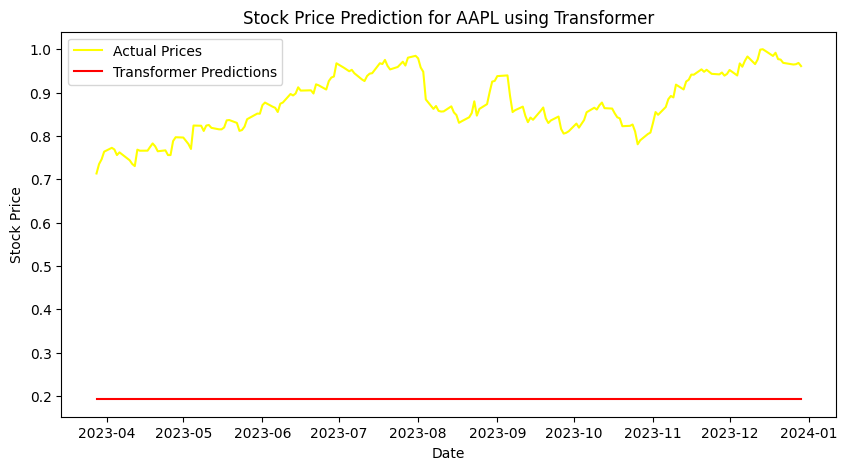

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(stock_data.index[-min_len:], Y_test_original, label="Actual Prices", color='yellow')
plt.plot(stock_data.index[-min_len:], transformer_predictions, label="Transformer Predictions", color='red')
plt.legend()
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction for AAPL using Transformer")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to calculate MSE, RMSE, and R² Score
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f" {model_name} Performance:")
    print(f" MSE: {mse:.4f}")
    print(f" RMSE: {rmse:.4f}")
    print(f" R² Score: {r2:.4f}\n")

    return mse, rmse, r2

In [ ]:
# Evaluate LSTM
lstm_mse, lstm_rmse, lstm_r2 = evaluate_model(Y_test_original, lstm_predictions, "LSTM")

# Evaluate GRU
gru_mse, gru_rmse, gru_r2 = evaluate_model(Y_test_original, gru_predictions, "GRU")

# Evaluate Transformer
transformer_mse, transformer_rmse, transformer_r2 = evaluate_model(Y_test_original, transformer_predictions, "Transformer")

 LSTM Performance:
 MSE: 29984.0975
 RMSE: 173.1592
 R² Score: -6105242.8151

 GRU Performance:
 MSE: 30900.2575
 RMSE: 175.7847
 R² Score: -6291787.7097

 Transformer Performance:
 MSE: 0.4694
 RMSE: 0.6852
 R² Score: -94.5861



In [ ]:
import pandas as pd

# Store results in a DataFrame
results_df = pd.DataFrame({
    "Model": ["LSTM", "GRU", "Transformer"],
    "MSE": [lstm_mse, gru_mse, transformer_mse],
    "RMSE": [lstm_rmse, gru_rmse, transformer_rmse],
    "R² Score": [lstm_r2, gru_r2, transformer_r2]
})

# Display Results
print(results_df)


         Model           MSE        RMSE      R² Score
0         LSTM  29984.097493  173.159168 -6.105243e+06
1          GRU  30900.257515  175.784691 -6.291788e+06
2  Transformer      0.469443    0.685159 -9.458607e+01
